In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc
from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH, ONE_COL_GOLDEN_RATIO_HEIGHT_INCH

from gptchem.plotsettings import *

%matplotlib inline

## Load results

In [3]:
all_out = glob("out/**/*.pkl")

In [4]:
all_out = [load_pickle(p) for p in all_out]

In [5]:
all_out

[{'train_size': 100,
  'predictions': (#69) [1,1,1,1,1,0,1,1,1,1...],
  'xgboost': {'accuracy': 0.7681159420289855,
   'acc_macro': 0.7681159420289855,
   'racc': 0.6286494433942449,
   'kappa': 0.37556561085972845,
   'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]),
   'f1_macro': 0.6877828054298643,
   'f1_micro': 0.7681159420289855,
   'frac_valid': 1.0,
   'all_y_true': (#69) [1,1,0,1,1,1,1,1,0,1...],
   'all_y_pred': array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
          0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
          1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
          1, 1, 0]),
   'valid_indices': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,

In [6]:
extracted_res = []
xgboost_results = []
tabpfn_results = []
dummy_results = []

for out in all_out:
    res = {
        "train_size": out["train_size"],
        "frac_valid": out["frac_valid"],
        "accuracy": out["accuracy"],
        "f1_macro": out["f1_macro"],
        "f1_micro": out["f1_micro"],
        "kappa": out["kappa"],
    }

    xgb_res = {
        "train_size": out["train_size"],
        "accuracy": out["xgboost"]["accuracy"],
        "f1_macro": out["xgboost"]["f1_macro"],
        "f1_micro": out["xgboost"]["f1_micro"],
        "kappa": out["xgboost"]["kappa"],
    }

    tabpfn_res = {
        "train_size": out["train_size"],
        "accuracy": out["tabpfn"]["accuracy"],
        "f1_macro": out["tabpfn"]["f1_macro"],
        "f1_micro": out["tabpfn"]["f1_micro"],
        "kappa": out["tabpfn"]["kappa"],
    }


    extracted_res.append(res)
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)


In [7]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [8]:
grouped_res = res.groupby(["train_size"]).agg(["mean", "std", "count", sem])

In [9]:
grouped_xgboost_res = xgboost_res.groupby(["train_size"]).agg(["mean", "std", "count", sem])

In [10]:
grouped_tabpfn_res = tabpfn_res.groupby(["train_size"]).agg(["mean", "std", "count", sem])

In [11]:
grouped_res.loc[:]

frac_valid                  accuracy                            \
                 mean  std count  sem      mean       std count       sem   
train_size                                                                  
10                1.0  0.0     7  0.0  0.727763  0.063385     7  0.023957   
20                1.0  0.0     6  0.0  0.720358  0.059979     6  0.024486   
50                1.0  0.0     6  0.0  0.738095  0.035020     6  0.014297   
100               1.0  0.0     5  0.0  0.779710  0.025925     5  0.011594   
150               1.0  0.0     5  0.0  0.821053  0.088069     5  0.039386   

            f1_macro                            f1_micro                  \
                mean       std count       sem      mean       std count   
train_size                                                                 
10          0.425996  0.008468     7  0.003200  0.727763  0.063385     7   
20          0.472940  0.022872     6  0.009337  0.720358  0.059979     6   
50          0.523246  0.064122     6  0.026178  0.738095  0.035020     6   
100         0.630832  0.069530     5  0.031095  0.779710  0.025925     5   
150         0.730323  0.136710     5  0.061138  0.821053  0.088069     5   

                         kappa                            
                 sem      mean       std count       sem  
train_size                                                
10          0.023957 -0.031267  0.068071     7  0.025728  
20          0.024486  0.014122  0.050774     6  0.020728  
50          0.014297  0.094469  0.111216     6  0.045404  
100         0.011594  0.287701  0.114882     5  0.051377  
150         0.039386  0.471059  0.268077     5  0.119888

In [12]:
grouped_tabpfn_res

accuracy                            f1_macro                  \
                mean       std count       sem      mean       std count   
train_size                                                                 
10          0.761006  0.010893     7  0.004117  0.468486  0.038014     7   
20          0.759508  0.024902     6  0.010166  0.548053  0.076185     6   
50          0.775910  0.018153     6  0.007411  0.578230  0.114520     6   
100         0.826087  0.030744     5  0.013749  0.711082  0.084724     5   
150         0.800000  0.057655     5  0.025784  0.683990  0.109603     5   

                      f1_micro                               kappa            \
                 sem      mean       std count       sem      mean       std   
train_size                                                                     
10          0.014368  0.761006  0.010893     7  0.004117  0.051348  0.057273   
20          0.031102  0.759508  0.024902     6  0.010166  0.150799  0.110791   
50          0.046752  0.775910  0.018153     6  0.007411  0.214988  0.170249   
100         0.037890  0.826087  0.030744     5  0.013749  0.439245  0.148718   
150         0.049016  0.800000  0.057655     5  0.025784  0.390248  0.201000   

                            
           count       sem  
train_size                  
10             7  0.021647  
20             6  0.045230  
50             6  0.069504  
100            5  0.066509  
150            5  0.089890

In [13]:
grouped_xgboost_res

accuracy                                f1_macro                  \
                mean       std count           sem      mean       std count   
train_size                                                                     
10          0.754717  0.000000     7  4.532467e-17  0.430108  0.000000     7   
20          0.743848  0.029535     6  1.205773e-02  0.477536  0.076627     6   
50          0.743697  0.053081     6  2.167025e-02  0.612356  0.078111     6   
100         0.773913  0.052854     5  2.363697e-02  0.667733  0.112836     5   
150         0.789474  0.091161     5  4.076825e-02  0.706604  0.133656     5   

                      f1_micro                                   kappa  \
                 sem      mean       std count           sem      mean   
train_size                                                               
10          0.000000  0.754717  0.000000     7  4.532467e-17  0.000000   
20          0.031283  0.743848  0.029535     6  1.205773e-02  0.048408   
50          0.031889  0.743697  0.053081     6  2.167025e-02  0.235633   
100         0.050462  0.773913  0.052854     5  2.363697e-02  0.348295   
150         0.059773  0.789474  0.091161     5  4.076825e-02  0.423227   

                                      
                 std count       sem  
train_size                            
10          0.000000     7  0.000000  
20          0.092682     6  0.037837  
50          0.148388     6  0.060579  
100         0.206904     5  0.092530  
150         0.257675     5  0.115236

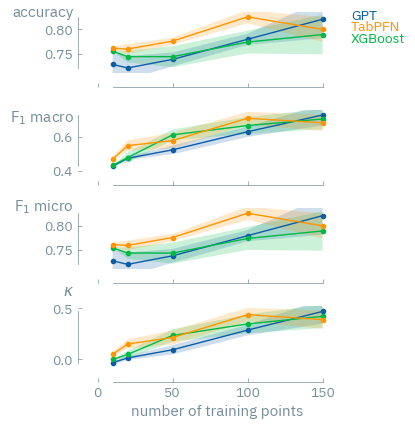

In [14]:
# with plt.style.context(matplotx.styles.dufte):
fig, ax = plt.subplots(
    4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), sharex="all"
)

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
    ax[i].plot(
        grouped_res.loc[ :].index,
        grouped_res.loc[:][metric]["mean"],
        marker="o",
        label="GPT",
    )
    ax[i].fill_between(
        grouped_res.loc[ :].index,
        grouped_res.loc[:][metric]["mean"] - grouped_res.loc[ :][metric]["sem"],
        grouped_res.loc[ :][metric]["mean"] + grouped_res.loc[ :][metric]["sem"],
        alpha=0.2,
    )

    range_frame(
        ax[i],
        grouped_res.loc[ :].index,
        np.stack([
            grouped_res.loc[:][metric]["mean"],
              grouped_xgboost_res.loc[ :][metric]["mean"],
              grouped_tabpfn_res.loc[ :][metric]["mean"], 
        ]).flatten()
    )

    ax[i].plot(
        grouped_xgboost_res.loc[ :].index,
        grouped_xgboost_res.loc[ :][metric]["mean"],
        marker="o",
        label="XGBoost",
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[ :].index,
        grouped_xgboost_res.loc[:][metric]["mean"]
        - grouped_xgboost_res.loc[ :][metric]["sem"],
        grouped_xgboost_res.loc[:][metric]["mean"]
        + grouped_xgboost_res.loc[:][metric]["sem"],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[ :].index,
        grouped_tabpfn_res.loc[ :][metric]["mean"],
        marker="o",
        label="TabPFN",
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[ :].index,
        grouped_tabpfn_res.loc[:][metric]["mean"]
        - grouped_tabpfn_res.loc[ :][metric]["sem"],
        grouped_tabpfn_res.loc[ :][metric]["mean"]
        + grouped_tabpfn_res.loc[:][metric]["sem"],
        alpha=0.2,
    )

ylabel_top("accuracy", ax=ax[0], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ macro", ax=ax[1], x_pad=0.05, y_pad=0.06)
ylabel_top(r"F$_{1}$ micro", ax=ax[2], x_pad=0.05, y_pad=0.06)
ylabel_top(r"$\kappa$", ax=ax[3], x_pad=0.05, y_pad=0.06)
ax[-1].set_xlabel("number of training points", labelpad=4)
matplotx.line_labels(ax=ax[0])
plt.subplots_adjust(hspace=.6, top=1, bottom=.2)

fig.savefig("mof_water_stability.pdf", bbox_inches="tight")

In [17]:
find_learning_curve_intersection(
    grouped_res.loc[:]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[:].index,
        grouped_xgboost_res.loc[ :]["f1_macro"]["mean"],
    )[0],
) / 10

1.250765306761347

In [ ]:
find_learning_curve_intersection(
    grouped_res.loc[2, :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_tabpfn_res.loc[2, :].index,
        grouped_tabpfn_res.loc[2, :]["f1_macro"]["mean"],
    )[0],
) / 10

KeyError: 2